In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Load the dataset
data_path = r"C:\Users\Admin\Desktop\ML online\week5\DataSetForPhishingVSBenignUrl.csv"

# Define the column names based on the table header you provided
column_names = [
    "Querylength", "domain_token_count", "path_token_count", "avgdomaintokenlen", "longdomaintokenlen",
    "avgpathtokenlen", "tld", "charcompvowels", "charcompace", "ldl_url", "ldl_domain", "ldl_path", "ldl_filename",
    "ldl_getArg", "dld_url", "dld_domain", "dld_path", "dld_filename", "dld_getArg", "urlLen", "domainlength",
    "pathLength", "subDirLen", "fileNameLen", "this.fileExtLen", "ArgLen", "pathurlRatio", "ArgUrlRatio", 
    "argDomanRatio", "domainUrlRatio", "pathDomainRatio", "argPathRatio", "executable", "isPortEighty", 
    "NumberofDotsinURL", "ISIpAddressInDomainName", "CharacterContinuityRate", "LongestVariableValue", "URL_DigitCount",
    "host_DigitCount", "Directory_DigitCount", "File_name_DigitCount", "Extension_DigitCount", "Query_DigitCount", 
    "URL_Letter_Count", "host_letter_count", "Directory_LetterCount", "Filename_LetterCount", "Extension_LetterCount", 
    "Query_LetterCount", "LongestPathTokenLength", "Domain_LongestWordLength", "Path_LongestWordLength", 
    "sub-Directory_LongestWordLength", "Arguments_LongestWordLength", "URL_sensitiveWord", "URLQueries_variable",
    "spcharUrl", "delimeter_Domain", "delimeter_path", "delimeter_Count", "NumberRate_URL", "NumberRate_Domain",
    "NumberRate_DirectoryName", "NumberRate_FileName", "NumberRate_Extension", "NumberRate_AfterPath", "SymbolCount_URL",
    "SymbolCount_Domain", "SymbolCount_Directoryname", "SymbolCount_FileName", "SymbolCount_Extension", 
    "SymbolCount_Afterpath", "Entropy_URL", "Entropy_Domain", "Entropy_DirectoryName", "Entropy_Filename",
    "Entropy_Extension", "Entropy_Afterpath", "URL_Type_obf_Type"
]

# Load the dataset
df = pd.read_csv(data_path, header=None, names=column_names, skiprows=1, low_memory=False)

# Display the first few rows of the dataset
df.head()


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0,4,5,5.5,14,4.400000,4,8,3,0,...,1,0,-1,0.726298,0.784493,0.894886,0.850608,NaN,-1.0,Defacement
1,0,4,5,5.5,14,6.000000,4,12,4,0,...,0,0,-1,0.688635,0.784493,0.814725,0.859793,0.0,-1.0,Defacement
2,0,4,5,5.5,14,5.800000,4,12,5,0,...,0,0,-1,0.695049,0.784493,0.814725,0.801880,0.0,-1.0,Defacement
3,0,4,12,5.5,14,5.500000,4,32,16,0,...,0,0,-1,0.640130,0.784493,0.814725,0.663210,0.0,-1.0,Defacement
4,0,4,6,5.5,14,7.333334,4,18,11,0,...,0,0,-1,0.681307,0.784493,0.814725,0.804526,0.0,-1.0,Defacement


In [10]:
# Handle Inf and NaN values
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].replace([np.inf, -np.inf], np.nan)

# Use SimpleImputer to fill missing values with the mean value of each column
imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = imputer.fit_transform(df[numeric_columns])

# Display the dataset after handling missing values
df.head()

,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_FileName,SymbolCount_Extension,SymbolCount_Afterpath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_Afterpath,URL_Type_obf_Type
0,0.0,4.0,5.0,5.5,14.0,4.400000,4.0,8.0,3.0,0.0,...,1.0,0.0,-1.0,0.726298,0.784493,0.894886,0.850608,0.508212,-1.0,Defacement
1,0.0,4.0,5.0,5.5,14.0,6.000000,4.0,12.0,4.0,0.0,...,0.0,0.0,-1.0,0.688635,0.784493,0.814725,0.859793,0.000000,-1.0,Defacement
2,0.0,4.0,5.0,5.5,14.0,5.800000,4.0,12.0,5.0,0.0,...,0.0,0.0,-1.0,0.695049,0.784493,0.814725,0.801880,0.000000,-1.0,Defacement
3,0.0,4.0,12.0,5.5,14.0,5.500000,4.0,32.0,16.0,0.0,...,0.0,0.0,-1.0,0.640130,0.784493,0.814725,0.663210,0.000000,-1.0,Defacement
4,0.0,4.0,6.0,5.5,14.0,7.333334,4.0,18.0,11.0,0.0,...,0.0,0.0,-1.0,0.681307,0.784493,0.814725,0.804526,0.000000,-1.0,Defacement


In [18]:
# Split data into features and target
X = df.iloc[:, :-1]  # All columns except the last are features
y = df.iloc[:, -1]   # The last column is the label (target)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train.shape}')
print(f'Testing set shape: {X_test.shape}')

Training set shape: (29365, 79)
Testing set shape: (7342, 79)


In [14]:
# Apply AdaBoost Classifier with different depths and criteria
results = []

for depth in [1, 3, 6, 9, 12, 15, 18]:
    for criterion in ['gini', 'entropy']:
        # Initialize the base classifier
        base_clf = DecisionTreeClassifier(max_depth=depth, criterion=criterion, random_state=42)
        # Initialize AdaBoost with the base classifier, specify the algorithm to 'SAMME'
        ada_clf = AdaBoostClassifier(estimator=base_clf, n_estimators=50, algorithm='SAMME', random_state=42)
        
        # Train the AdaBoost classifier
        ada_clf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = ada_clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        results.append({'depth': depth, 'criterion': criterion, 'accuracy': accuracy, 'model': 'AdaBoost'})


# Convert the results into a DataFrame for easier visualization
results_df = pd.DataFrame(results)


In [19]:
results_d = []

# Loop through tree depths from 1 to 6
for depth in range(1, 18):
    for criterion in ['gini', 'entropy']:
        # Initialize the Decision Tree Classifier
        clf = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        
        # Train the model
        clf.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = clf.predict(X_test)
        
        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store the results
        results_d.append({
            'depth': depth,
            'criterion': criterion,
            'accuracy': accuracy
        })

# Convert the results into a DataFrame for easier visualization
results_df_d = pd.DataFrame(results_d)

# Display the results DataFrame
print(results_df_d)

    depth criterion  accuracy
0       1      gini  0.375511
1       1   entropy  0.375511
2       2      gini  0.493735
3       2   entropy  0.492373
4       3      gini  0.625170
5       3   entropy  0.639199
6       4      gini  0.671479
7       4   entropy  0.677472
8       5      gini  0.723645
9       5   entropy  0.756470
10      6      gini  0.775266
11      6   entropy  0.786570
12      7      gini  0.811768
13      7   entropy  0.814356
14      8      gini  0.846227
15      8   entropy  0.846908
16      9      gini  0.876737
17      9   entropy  0.879597
18     10      gini  0.897439
19     10   entropy  0.902070
20     11      gini  0.912830
21     11   entropy  0.917053
22     12      gini  0.925633
23     12   entropy  0.929175
24     13      gini  0.933124
25     13   entropy  0.943885
26     14      gini  0.940616
27     14   entropy  0.950150
28     15      gini  0.944021
29     15   entropy  0.953010
30     16      gini  0.946881
31     16   entropy  0.954372
32     17 

In [20]:
# Step 7: Compare results with previous Decision Tree Classifier
previous_results = [
    {'depth': d, 'criterion': c, 'accuracy': acc, 'model': 'Decision Tree'}
    for d, c, acc in zip(
        [1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7, 8, 8, 9, 9, 10, 10, 11, 11, 12, 12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17],
        ['gini', 'entropy'] * 17,
        [
            0.375511, 0.375511, 0.493735, 0.492373, 0.625170, 0.639199,
            0.671479, 0.677472, 0.723645, 0.756470, 0.775266, 0.786570,
            0.811768, 0.814356, 0.846227, 0.846908, 0.876737, 0.879597,
            0.897439, 0.902070, 0.912830, 0.917053, 0.925633, 0.929175,
            0.933124, 0.943885, 0.940616, 0.950150, 0.944021, 0.953010,
            0.946881, 0.954372, 0.948924, 0.954917
        ]
    )
]

previous_results_df = pd.DataFrame(previous_results)

# Combine AdaBoost and Decision Tree results
combined_results_df = pd.concat([results_df, previous_results_df])

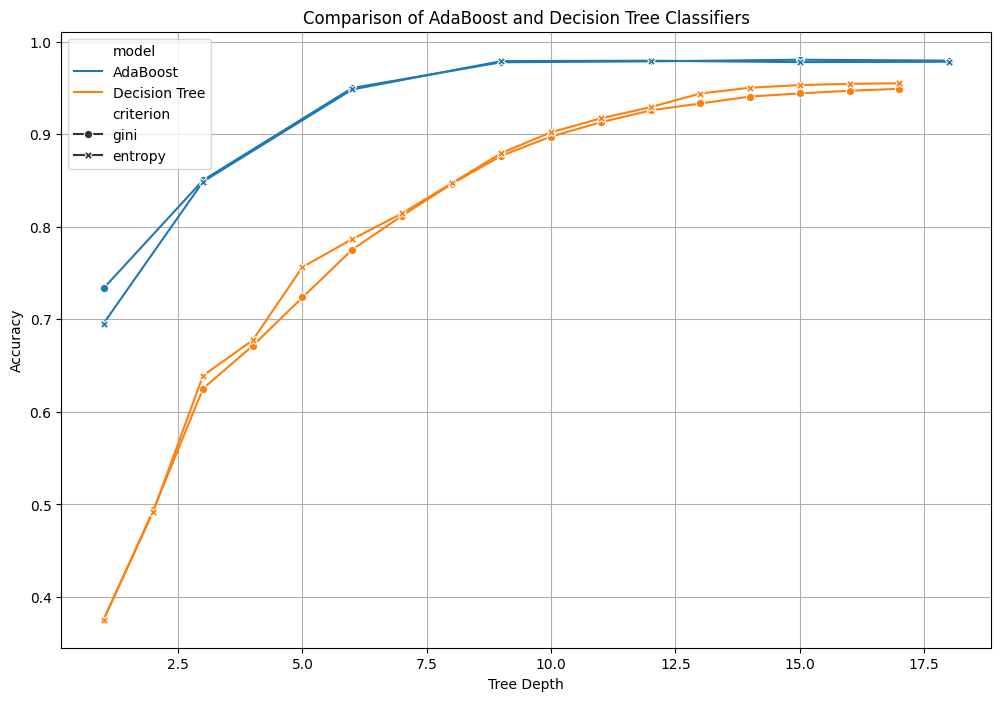

In [21]:
# Step 8: Visualization of results
plt.figure(figsize=(12, 8))
sns.lineplot(data=combined_results_df, x='depth', y='accuracy', hue='model', style='criterion', markers=True, dashes=False)
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.title('Comparison of AdaBoost and Decision Tree Classifiers')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [24]:
'''
###Conclusion
1. Observations from the Plot
AdaBoost Performance: 
The blue curve shows that AdaBoost achieves high accuracy across all tree depths, 
particularly stabilizing at near-perfect accuracy after depth 5. This indicates strong stability and generalization capability.

Decision Tree Performance: 
The orange curve represents the Decision Tree model, which improves in accuracy as tree depth increases, 
but levels off around depths 10-15. It generally underperforms compared to AdaBoost.

Criterion (Gini vs. Entropy): The performance difference between using "gini" and "entropy" criteria is minimal, with similar trends for both.

2. Advantages of Using AdaBoost
Higher Accuracy: AdaBoost consistently outperforms the Decision Tree in terms of accuracy at all depths, 
indicating its effectiveness in boosting the overall model performance.

Better Generalization: 
While the Decision Tree accuracy improves with depth, it risks overfitting at larger depths. 
AdaBoost, however, stabilizes earlier, suggesting stronger generalization and reduced overfitting.

Stability: AdaBoost maintains high accuracy beyond depth 5, while Decision Tree results show more fluctuation. 
AdaBoost’s boosting mechanism helps improve stability by focusing on challenging samples during each iteration.

3. Conclusion
Accuracy & Generalization: AdaBoost offers higher accuracy and better generalization across all tree depths compared to a standalone Decision Tree.
When to Use: Use AdaBoost when high accuracy is needed, and computational resources are available. For simplicity or interpretability, a Decision Tree might be preferable.
'''

'\n###Conclusion\n1. Observations from the Plot\nAdaBoost Performance: \nThe blue curve shows that AdaBoost achieves high accuracy across all tree depths, \nparticularly stabilizing at near-perfect accuracy after depth 5. This indicates strong stability and generalization capability.\n\nDecision Tree Performance: \nThe orange curve represents the Decision Tree model, which improves in accuracy as tree depth increases, \nbut levels off around depths 10-15. It generally underperforms compared to AdaBoost.\n\nCriterion (Gini vs. Entropy): The performance difference between using "gini" and "entropy" criteria is minimal, with similar trends for both.\n\n2. Advantages of Using AdaBoost\nHigher Accuracy: AdaBoost consistently outperforms the Decision Tree in terms of accuracy at all depths, \nindicating its effectiveness in boosting the overall model performance.\n\nBetter Generalization: \nWhile the Decision Tree accuracy improves with depth, it risks overfitting at larger depths. \nAdaBoos